In [6]:
import sys
import os
import pandas as pd
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
import matplotlib.pyplot as plt

from IPython.display import Audio 
from IPython.display import display


sys.path.append('Dataset')
from dataset import LjSpeechDataset
sys.path.append('Preprocessing')
from preprocessing import LJSpeechPreprocessor
sys.path.append('config')
import settings

In [2]:
speechDataset = LjSpeechDataset(
        data_path=settings.DATA_PATH,
        charlist_file=settings.CHARLIST_PATH,
        batch_size=settings.BATCH_SIZE
    )
    
charlist = speechDataset.get_charlist()
wavs_path = speechDataset.get_wavs_path()

preprocessor = LJSpeechPreprocessor(charlist, wavs_path)
(train_ds, val_ds, test_ds) = speechDataset.create_data_pipelines(preprocessor)

char_to_num = preprocessor.get_char_to_num()
num_to_char = preprocessor.get_num_to_char()

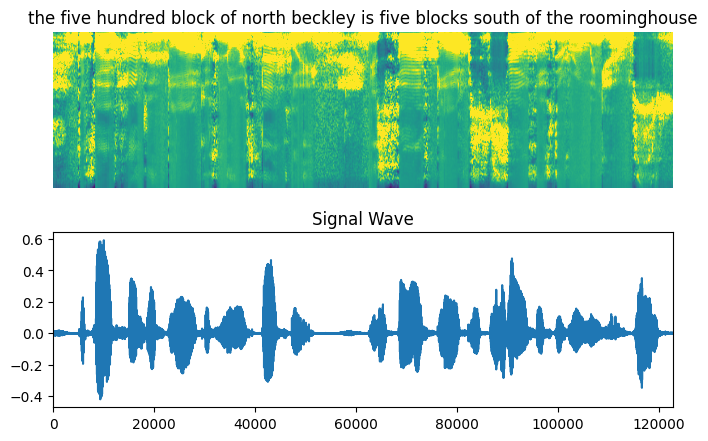

In [7]:
fig = plt.figure(figsize=(8, 5))
for batch in train_ds.take(1):
    spectrogram = batch[0][0].numpy()
    spectrogram = np.array([np.trim_zeros(x) for x in np.transpose(spectrogram)])
    label = batch[1][0]
    # Spectrogram
    label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
    ax = plt.subplot(2, 1, 1)
    ax.imshow(spectrogram, vmax=1)
    ax.set_title(label)
    ax.axis("off")
    # Wav
    file = tf.io.read_file(wavs_path + list(speechDataset.train_pd["file_name"])[0] + ".wav")
    audio, _ = tf.audio.decode_wav(file)
    audio = audio.numpy()
    ax = plt.subplot(2, 1, 2)
    plt.plot(audio)
    ax.set_title("Signal Wave")
    ax.set_xlim(0, len(audio))
    display(Audio(np.transpose(audio), rate=16000))
plt.show()